# Montamos las librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Carga de los datos

In [ ]:
df = pd.read_csv('train.csv', index_col= 'id', na_values='#N/D')
test_df = pd.read_csv('test.csv', index_col= 'id')

In [ ]:
test_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [ ]:
test_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation


 # Información original del Dataset


La variable categorica a predecir es: NObeyesdad

Este dataset es para la competición de Kaggle "Multi-Class Prediction of Obesity Risk"

El dataset fue generado por un modelo de deep learning entrenado en obesidad o riesgo de CVD.

Las caracteristicas estan cerca, pero no son exactamente las mismas que el original. Se puede usar el dataset original para comparar diferencias o ver si el uso del mismo mejora el entrenamiento.

Nota: Este dataset es perfecto para visualización, clustering y EDA


-------------------------------------------------------------------

Las subidas se evaluaran usando la metrica de accuracy.

El fichero subido debe seguir el siguiente formato:

id,NObeyesdad

20758,Normal_Weight

20759,Normal_Weight

20760,Normal_Weight

etc.

-------------------------------------------------------------------

In [ ]:
print (df['NObeyesdad'].unique())

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


Se busca detectar la el riesgo de obesidad a partir de un clasificador multiclase. Las posibilidades son:

* Overweight_Level_II
* Normal_Weight
* Insufficient_Weight
* Obesity_Type_III
* Obesity_Type_II
* Overweight_Level_I
* Obesity_Type_I



Las caracteristicas son:

* Gender: El género de la persona. Es probable que esta característica se refiera a si la persona es masculina o femenina.

* Age: La edad de la persona. Esta es una variable numérica continua que representa cuántos años tiene la persona.

* Height: La altura de la persona, probablemente en metros o centímetros. Es otra variable numérica continua.

* Weight: El peso de la persona, posiblemente en kilogramos o libras. Es una variable numérica continua.

* family_history_with_overweight: Historial familiar de sobrepeso. Esta característica podría indicar si hay antecedentes de sobrepeso u obesidad en la familia de la persona, lo cual puede ser un factor de riesgo importante. Probablemente es una variable categórica (sí/no).

* FAVC: Frecuencia de consumo de alimentos altos en calorías. Esta característica podría estar relacionada con la frecuencia con la que la persona come alimentos que son altos en calorías. Es probablemente una variable categórica (sí/no).

* FCVC: Frecuencia de consumo de verduras. Indica qué tan a menudo la persona come verduras, siendo una posible variable categórica o numérica ordinal.

* NCP: Número de comidas principales. Se refiere a la cantidad de comidas principales que la persona tiene en un día. Podría ser una variable numérica o categórica ordinal.

* CAEC: Consumo de alimentos entre comidas. Esta característica se refiere a cuánto come la persona entre las comidas principales. Podría ser una variable categórica que describe la frecuencia.

* SMOKE: Indica si la persona fuma o no. Es probablemente una variable categórica binaria (sí/no).

* CH2O: Consumo de agua diario. Esta característica probablemente representa la cantidad de agua que la persona bebe cada día, posiblemente en litros. Sería una variable numérica continua.

* SCC: Calorías consumidas en el monitoreo del consumo. Podría referirse a si la persona mantiene un registro de su consumo calórico o no, siendo una variable categórica (sí/no).

* FAF: Frecuencia de actividad física. Indica con qué frecuencia la persona realiza actividad física. Podría ser numérica (por ejemplo, número de veces por semana) o categórica ordinal.

* TUE: Tiempo usando dispositivos electrónicos. Se refiere a la cantidad de tiempo que la persona pasa utilizando dispositivos electrónicos, probablemente en horas por día. Es una variable numérica continua.

* CALC: Consumo de alcohol. Indica la frecuencia del consumo de alcohol por parte de la persona. Puede ser una variable categórica que refleje la frecuencia de consumo.

* MTRANS: Medio de transporte. Esta característica se refiere al principal medio de transporte utilizado por la persona, lo que podría influir en su nivel de actividad física diaria. Probablemente sea una variable categórica.

* NObeyesdad: El nivel de obesidad. Esta es la variable objetivo, que clasifica a la persona en diferentes categorías de peso, desde peso insuficiente hasta varios tipos de obesidad.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

# Preprocesamiento de datos

* Limpieza

No existen valores NA en el dataset

In [ ]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Vamos a hacer un primer análisis para comprobar la naturaleza de las caracteristicas categoricas.

Vemos que las variables categóricas tienen pocas respuestas posibles, por lo que pasaremos a hacer un primer EDA

In [ ]:
import pandas as pd

# Suponiendo que tu DataFrame se llama 'df'
# Cambia el nombre si tu DataFrame tiene un nombre diferente

# Iterar a través de todas las columnas del DataFrame
for column in df.columns:
    # Si la columna no es de tipo numérico
    if df[column].dtype == 'object':
        print(f"Distribución de la variable categórica '{column}':")
        print(df[column].value_counts())
        print("\n")  # Añade una línea en blanco para mejor legibilidad

Distribución de la variable categórica 'Gender':
Female    10422
Male      10336
Name: Gender, dtype: int64


Distribución de la variable categórica 'family_history_with_overweight':
yes    17014
no      3744
Name: family_history_with_overweight, dtype: int64


Distribución de la variable categórica 'FAVC':
yes    18982
no      1776
Name: FAVC, dtype: int64


Distribución de la variable categórica 'CAEC':
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: CAEC, dtype: int64


Distribución de la variable categórica 'SMOKE':
no     20513
yes      245
Name: SMOKE, dtype: int64


Distribución de la variable categórica 'SCC':
no     20071
yes      687
Name: SCC, dtype: int64


Distribución de la variable categórica 'CALC':
Sometimes     15066
no             5163
Frequently      529
Name: CALC, dtype: int64


Distribución de la variable categórica 'MTRANS':
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbik

In [ ]:
# Creamos la función para el EDA automatico de variables categoricas

def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

Al ejecutar la funcion, vemos que:

* El genero esta repartido de forma bastante homogenea.

* Gran parte de la muestra tiene antecedentes con obesidad

* La gran mayoria de la muestra consume alimentos en calorias con frecuencia

* Casi toda la muestra come a veces entre comidas

* Practicamente toda la muestra no fuma

* Casi nadie mantiene un registro de calorias consumidas

* La mayoria o no consume alcohol o lo consume a veces.

* La mayoria usa transporte publico, seguido por el coche y muy pocos andan. La bici o moto es residual o nula

* En la muestra predomina la obesidad tipo 3, seguido por la obesidad tipo 2, el peso normal y la obesidad tipo 1, en ultima representacion se encuentrea el peso insuficiente, el sobrepeso nivel 2 y el sobrepeso nivel 1

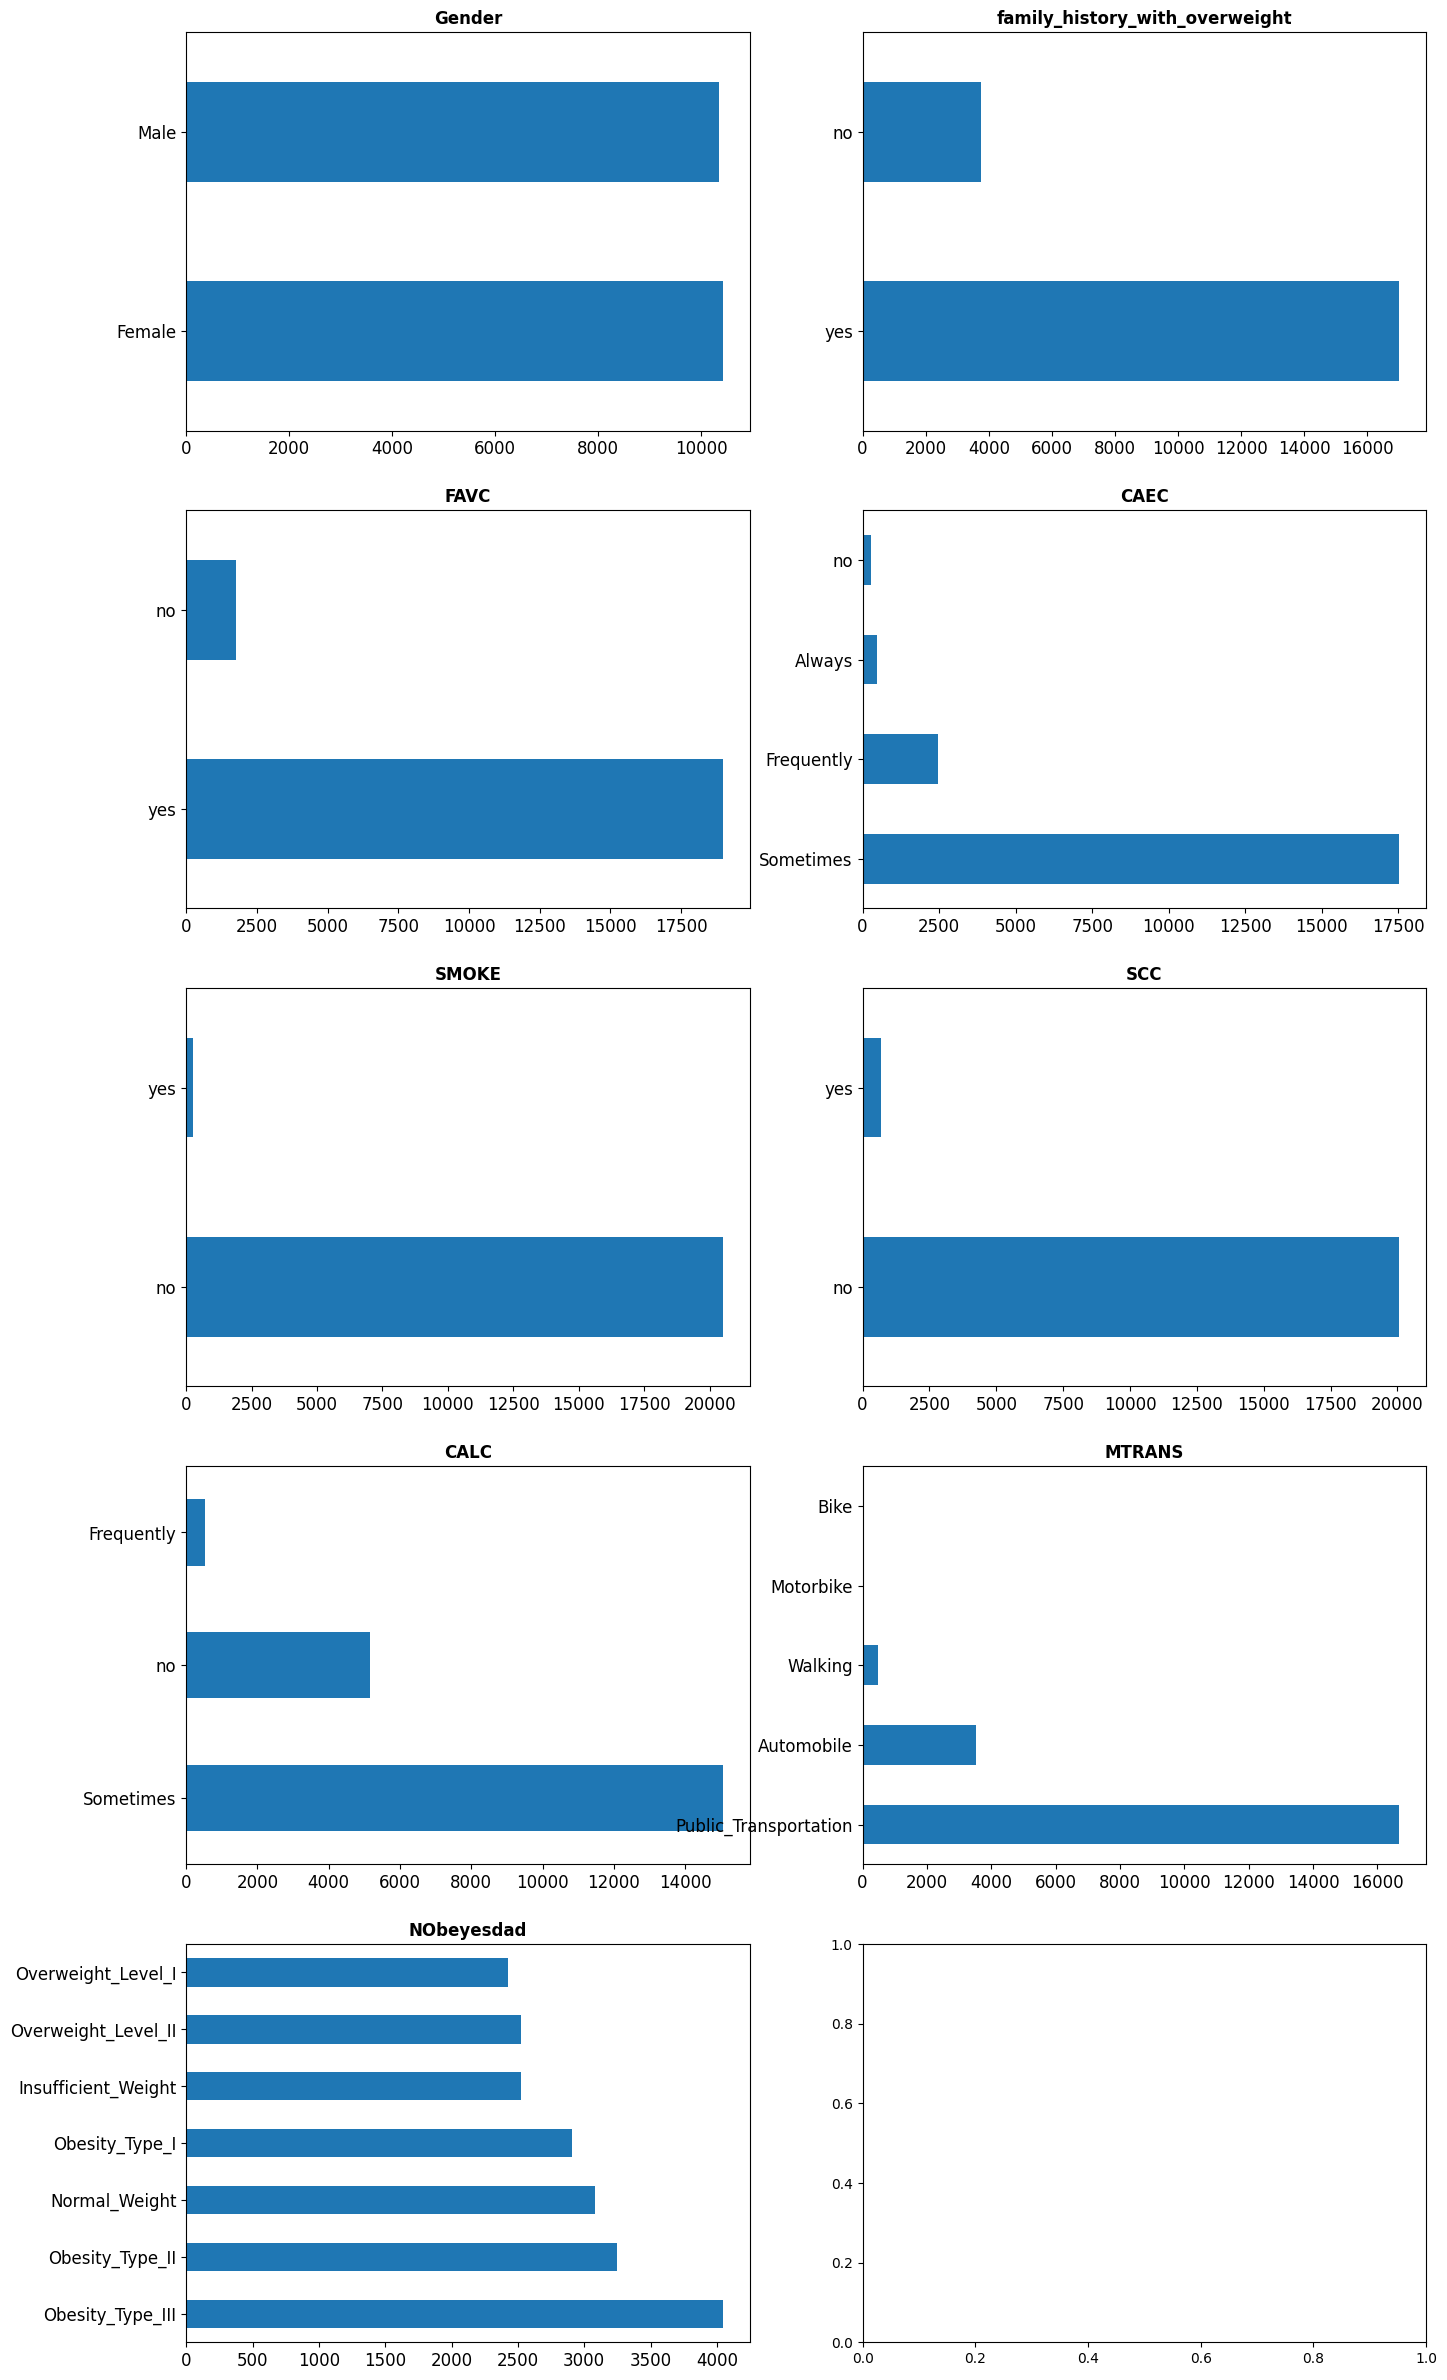

In [ ]:
# Ejecutamos la función

graficos_eda_categoricos(df.select_dtypes('O'))

En resumen, las distribuciones son:

Gender:

Female: 10422
Male: 10336
family_history_with_overweight:

Yes: 17014
No: 3744
FAVC (Frecuencia de consumo de alimentos altos en calorías):

Yes: 18982
No: 1776
CAEC (Consumo de Alimentos Entre Comidas):

Sometimes: 17529
Frequently: 2472
Always: 478
No: 279
SMOKE:

No: 20513
Yes: 245
SCC (Autoevaluación de Consumo de Calorías):

No: 20071
Yes: 687
CALC (Consumo de Alcohol):

Sometimes: 15066
No: 5163
Frequently: 529
MTRANS (Modo de Transporte):

Public_Transportation: 16687
Automobile: 3534
Walking: 467
Motorbike: 38
Bike: 32
NObeyesdad (Clasificación de Obesidad):

Obesity_Type_III: 4046
Obesity_Type_II: 3248
Normal_Weight: 3082
Obesity_Type_I: 2910
Insufficient_Weight: 2523
Overweight_Level_II: 2522
Overweight_Level_I: 2427

Ahora vamos a hacer un EDA de las variables numericas

In [ ]:
# Funcion para hacer estadisticos de variables numericas

def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

El analisis descriptivo indica:

* Edad (Age):

Media y mediana cercanas, con una desviación estándar relativamente alta.
Esto sugiere una distribución posiblemente simétrica, tal vez ligeramente sesgada.
La distribución puede ser normal o casi normal.


* Altura (Height):

La media y la mediana son muy cercanas, con una desviación estándar pequeña.
Esto sugiere que la mayoría de los valores están agrupados cerca de la media, indicando una posible distribución normal.

* Peso (Weight):

Hay una gran diferencia entre la media y la mediana, y la desviación estándar es alta.
Esto indica una distribución asimétrica, posiblemente sesgada hacia la derecha.

* Consumo de Vegetales (FCVC):

La media y la mediana están cerca, pero el rango de valores es limitado (1 a 3).
Podría seguir una distribución uniforme o ligeramente sesgada.

* Número de Comidas Principales (NCP):

La media y la mediana son iguales, con un rango limitado (1 a 4).
Esto sugiere una distribución uniforme o una concentración de valores en torno a la media.

* Consumo de Agua (CH2O):

La media y la mediana están cercanas, y el rango de valores es limitado (1 a 3).
Puede tener una distribución uniforme o normal con limitaciones en los valores extremos.

* Actividad Física (FAF):

Diferencia entre la media y la mediana, y la desviación estándar es casi igual a la media.
Esto indica una distribución posiblemente asimétrica, posiblemente sesgada hacia la izquierda o derecha.

* Tiempo Usando Dispositivos Electrónicos (TUE):

La media y la mediana difieren ligeramente, y la desviación estándar es más baja que la media.
Esto podría indicar una distribución asimétrica

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Age,20758.0,23.841804,22.815416,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,1.700000,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,84.064875,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,2.393837,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,3.000000,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,2.000000,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,1.000000,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.573887,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


Estadísticas de Age:
count    20758.000000
mean        23.841804
std          5.688072
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: Age, dtype: float64


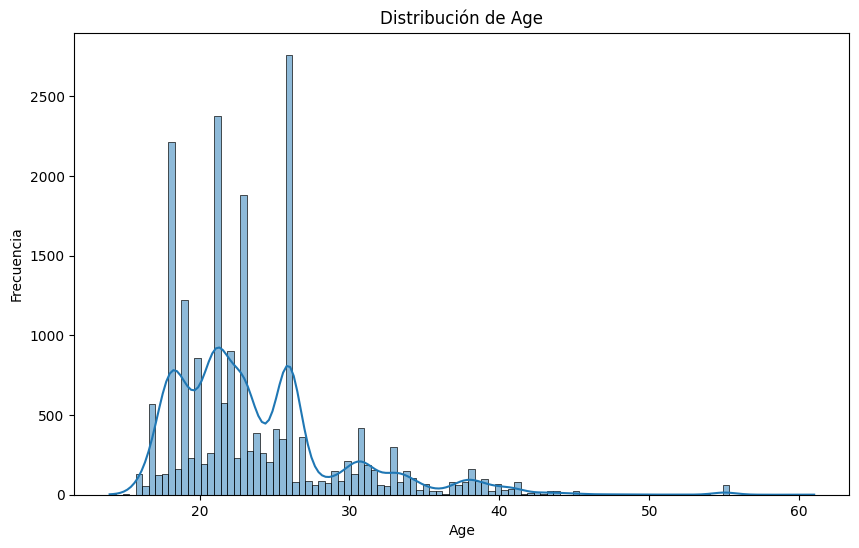

Estadísticas de Height:
count    20758.000000
mean         1.700245
std          0.087312
min          1.450000
25%          1.631856
50%          1.700000
75%          1.762887
max          1.975663
Name: Height, dtype: float64


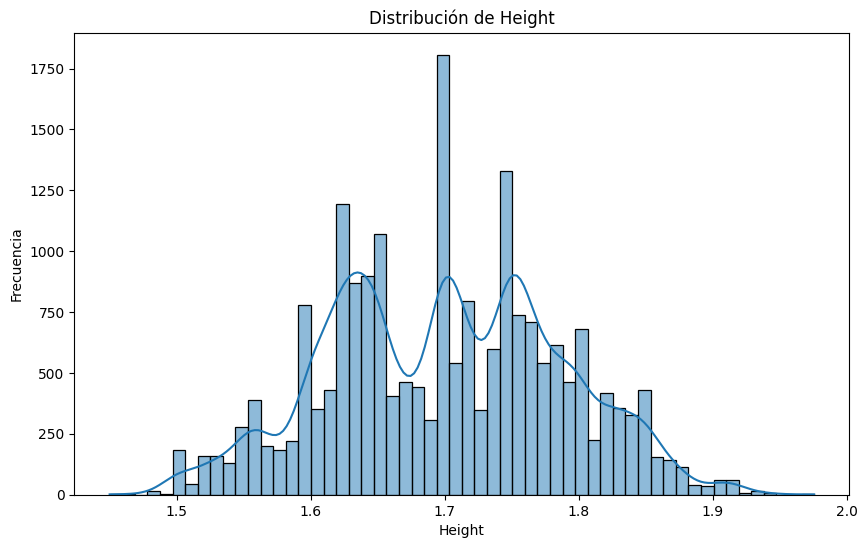

Estadísticas de Weight:
count    20758.000000
mean        87.887768
std         26.379443
min         39.000000
25%         66.000000
50%         84.064875
75%        111.600553
max        165.057269
Name: Weight, dtype: float64


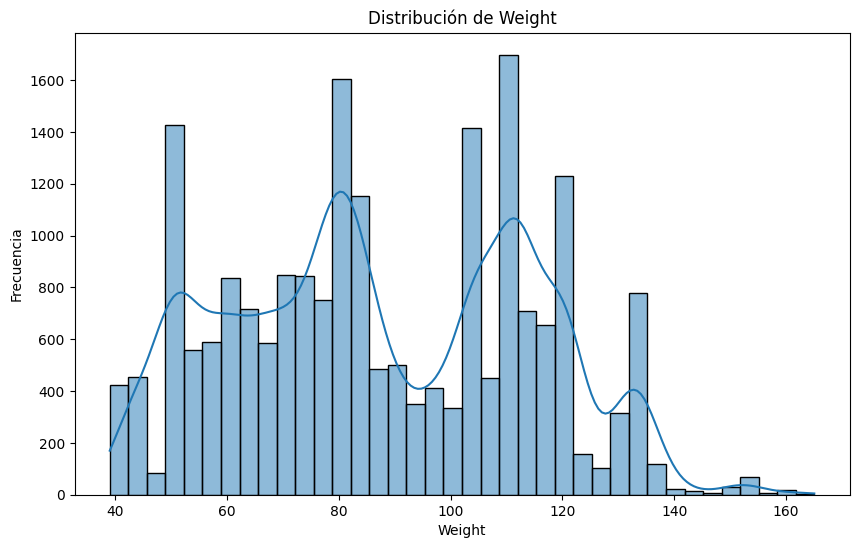

Estadísticas de FCVC:
count    20758.000000
mean         2.445908
std          0.533218
min          1.000000
25%          2.000000
50%          2.393837
75%          3.000000
max          3.000000
Name: FCVC, dtype: float64


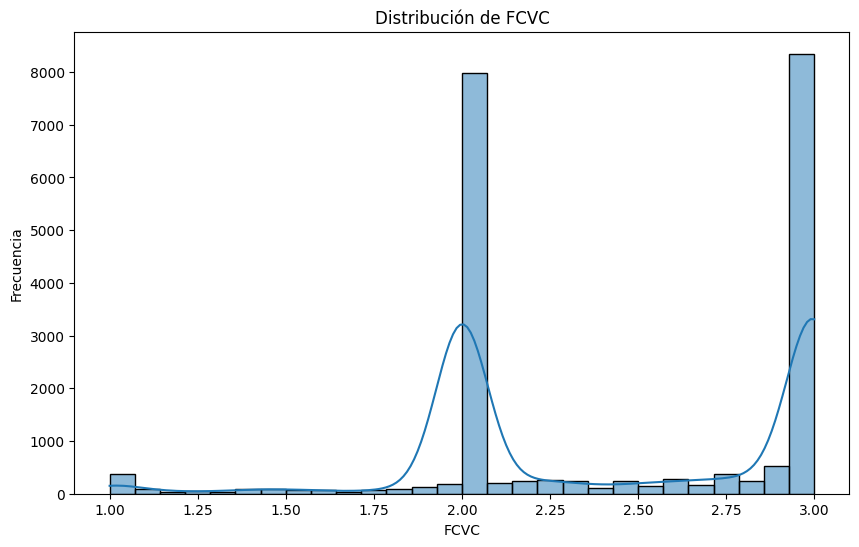

Estadísticas de NCP:
count    20758.000000
mean         2.761332
std          0.705375
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: NCP, dtype: float64


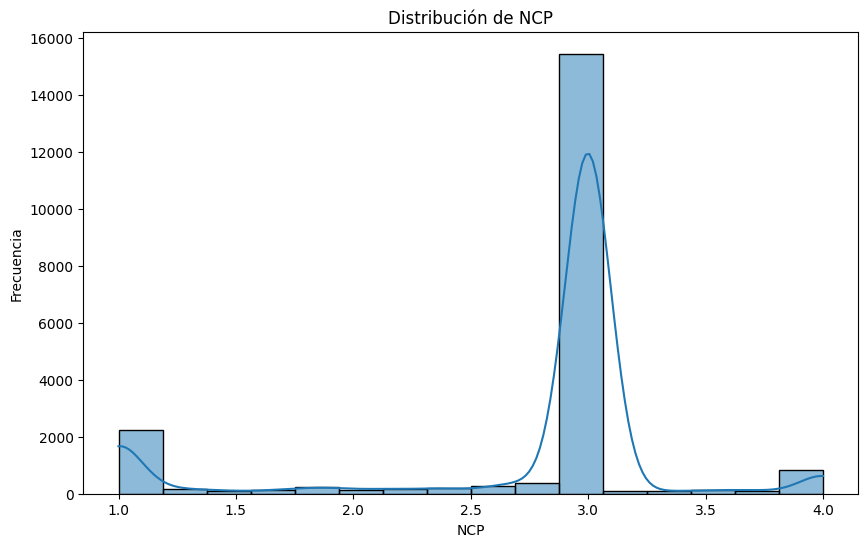

Estadísticas de CH2O:
count    20758.000000
mean         2.029418
std          0.608467
min          1.000000
25%          1.792022
50%          2.000000
75%          2.549617
max          3.000000
Name: CH2O, dtype: float64


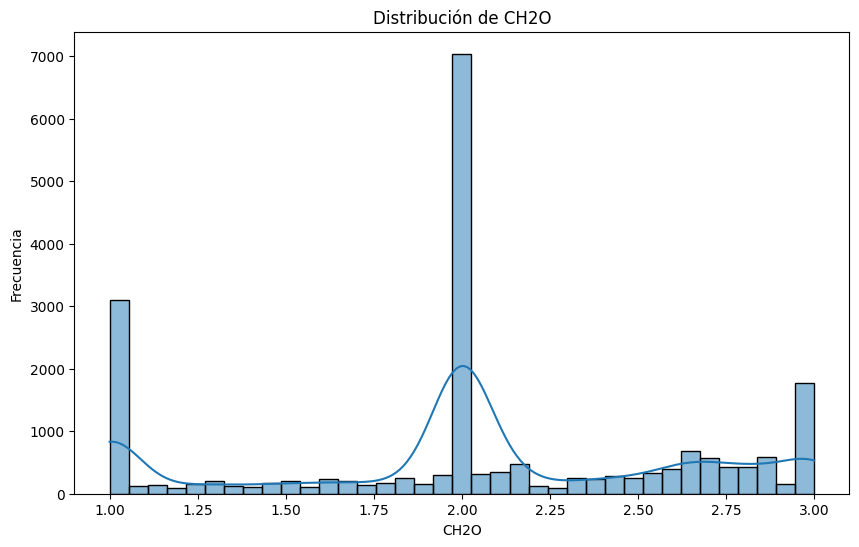

Estadísticas de FAF:
count    20758.000000
mean         0.981747
std          0.838302
min          0.000000
25%          0.008013
50%          1.000000
75%          1.587406
max          3.000000
Name: FAF, dtype: float64


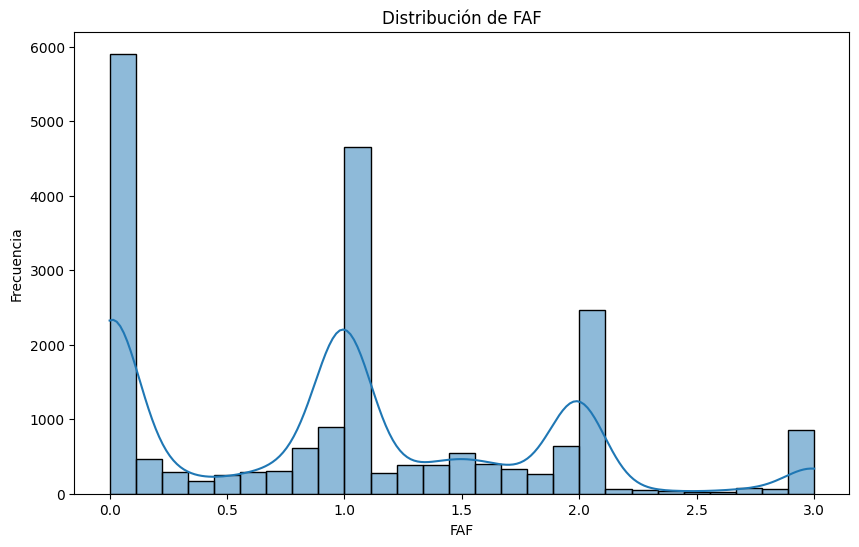

Estadísticas de TUE:
count    20758.000000
mean         0.616756
std          0.602113
min          0.000000
25%          0.000000
50%          0.573887
75%          1.000000
max          2.000000
Name: TUE, dtype: float64


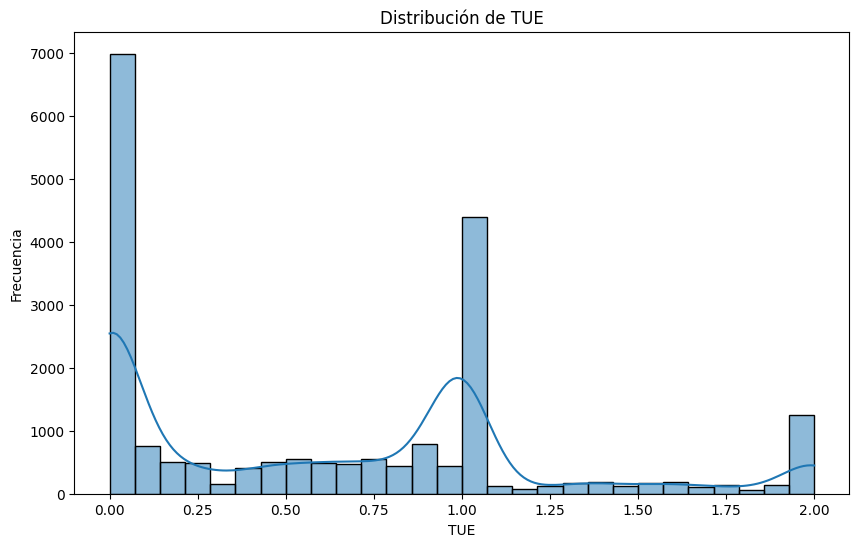

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    # Estadísticas descriptivas
    print(f"Estadísticas de {column}:")
    print(df[column].describe())

    # Histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


Vemos una clara tendencia multimodal en las variables numericas, lo que nos lleva a pensar en realizar clusterización

# Codificacion de variables categoricas

In [ ]:
import pandas as pd

# Asumiendo que 'df' es tu DataFrame original.

# Variables categóricas dicotómicas (binarias)
binary_categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Codificar variables binarias a 0 y 1
for col in binary_categorical_columns:
    df[col] = df[col].map({'no': 0, 'yes': 1, 'Female': 0, 'Male': 1})

# codificamos las del test

for col in binary_categorical_columns:
    test_df[col] = test_df[col].map({'no': 0, 'yes': 1, 'Female': 0, 'Male': 1})

# Variables categóricas con múltiples categorías
multiclass_categorical_columns = ['CAEC', 'CALC', 'MTRANS']

# Aplicar One-Hot Encoding solo a las variables categóricas con múltiples categorías
df_encoded = pd.get_dummies(df, columns=multiclass_categorical_columns)

test_df_encoded = pd.get_dummies(test_df, columns=multiclass_categorical_columns)

# Ahora df_encoded tiene las columnas originales numéricas más las nuevas columnas One-Hot encoded
# No es necesario renombrar las columnas ya que get_dummies lo hace automáticamente

# Verificar las primeras filas para asegurarse de que la codificación es correcta
print(df_encoded.head())


    Gender        Age    Height      Weight  family_history_with_overweight  \
id                                                                            
0        1  24.443011  1.699998   81.669950                               1   
1        0  18.000000  1.560000   57.000000                               1   
2        0  18.000000  1.711460   50.165754                               1   
3        0  20.952737  1.710730  131.274851                               1   
4        1  31.641081  1.914186   93.798055                               1   

    FAVC      FCVC       NCP  SMOKE      CH2O  ...  CAEC_Sometimes  CAEC_no  \
id                                             ...                            
0      1  2.000000  2.983297      0  2.763573  ...               1        0   
1      1  2.000000  3.000000      0  2.000000  ...               0        0   
2      1  1.880534  1.411685      0  1.910378  ...               1        0   
3      1  3.000000  3.000000      0  1.674061  ... 

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionando solo las columnas numéricas
data_numeric = df_encoded.select_dtypes(include=['float64', 'int64'])
test_data_numeric = test_df_encoded.select_dtypes(include=['float64', 'int64'])

# Estandarización de los datos de entrenamiento
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Estandarización de los datos de prueba con el mismo scaler
test_data_scaled = scaler.transform(test_data_numeric)


Grafico de codo:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

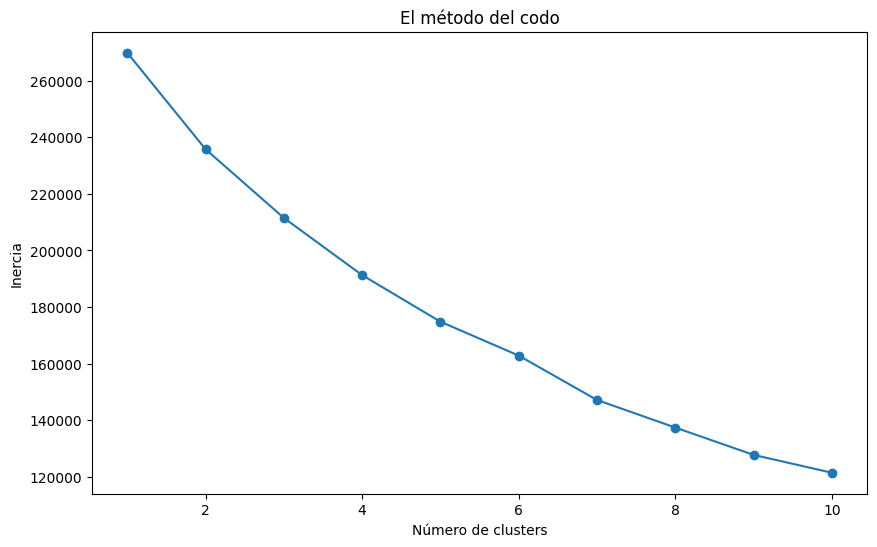

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Estandarizar los datos si aún no se ha hecho
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_numeric)

# Calcular la inercia para diferentes números de clusters
inertia = []
for i in range(1, 11):  # Ajusta este rango según sea necesario
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el gráfico de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')  # Ajusta el rango como en el loop
plt.title('El método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


K-Means:

In [ ]:
# Asumiendo que ya has decidido el número de clusters basado en el gráfico de codo
n_clusters = 5  # Ajusta esto basado en tu análisis del gráfico de codo

# Aplicar K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=80).fit(data_scaled)
df_encoded['KMeans_Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Conclusiones sobre los clusters de K-Means:

* Cluster 0 - "Los jóvenes activos":

Predominantemente de género masculino, este grupo representa a los más jóvenes, con una edad promedio de 20 años. Son en general más bajos y ligeros, posiblemente estudiantes o principiantes en sus carreras. Tienen un consumo moderado de vegetales y probablemente una actividad física moderada, lo que sugiere un equilibrio entre el estudio o trabajo y un estilo de vida activo.

* Cluster 1: "Los Establecidos"

Este grupo tiene una edad media de 25 años y una altura promedio, pero con un peso significativamente alto, lo que indica que podrían estar luchando con problemas de sobrepeso u obesidad. Su alto consumo de vegetales y actividad física relativamente baja sugiere que pueden estar en el proceso de ajustar sus hábitos alimenticios, posiblemente debido a la preocupación por su peso.

* Cluster 2: "Los Moderados"

Con una distribución de género equilibrada, este grupo de veinteañeros muestra un peso y altura promedio. Parecen tener hábitos saludables con una dieta equilibrada y una actividad física regular. Este podría ser el grupo más balanceado en términos de manejo de peso y estilo de vida saludable.


* Cluster 3: "Los Activos"

Este grupo pequeño y predominante masculino tiene una edad media de 26 años y es el más alto de todos los clusters. Aunque su peso es alto, esto podría atribuirse a una mayor masa muscular, respaldada por su alto nivel de actividad física. Podrían ser individuos que se dedican a trabajos físicos o deportistas.

* Cluster 4: "Los Experimentados"

Con la mayor edad promedio de 24 años y predominantemente masculino, este grupo también tiene un peso bastante alto. A pesar de su consumo de vegetales y actividad física moderada, su peso sugiere que podrían tener un estilo de vida más sedentario o factores genéticos que contribuyen al sobrepeso.


In [ ]:
# Asumiendo que ya has decidido el número de clusters basado en el gráfico de codo
n_clusters = 5  # Ajusta esto basado en tu análisis del gráfico de codo

# Aplicar K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=80).fit(test_data_scaled)
test_df_encoded['KMeans_Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Mostrar estadísticas para cada cluster
for cluster in range(n_clusters):
    print(f"Estadísticas del Cluster {cluster}:")
    print(df_encoded[df_encoded['KMeans_Cluster'] == cluster].describe())
    print("\n")


Estadísticas del Cluster 0:
            Gender          Age       Height       Weight  \
count  5531.000000  5531.000000  5531.000000  5531.000000   
mean      0.007051    25.825397     1.663899   106.611204   
std       0.083682     5.701224     0.064028    22.226353   
min       0.000000    16.000000     1.450000    42.000000   
25%       0.000000    21.682367     1.624560    88.032212   
50%       0.000000    25.967730     1.643332   110.804337   
75%       0.000000    26.000000     1.719956   114.479459   
max       1.000000    56.000000     1.930000   165.057269   

       family_history_with_overweight    FAVC         FCVC          NCP  \
count                     5531.000000  5531.0  5531.000000  5531.000000   
mean                         0.998373     1.0     2.863601     2.907458   
std                          0.040309     0.0     0.331390     0.417517   
min                          0.000000     1.0     1.000000     1.000000   
25%                          1.000000     1.0  

Esto nos lleva a varias preguntas para tirar del hilo y profundizar el análisis:

* Cual es la distribucion de cada grupo con la variable objetivo?
* Que caracteristicas similares tienen estos grupos
* Hay mucha variacion de los datos dentro de cada grupo?
*

<ipython-input-22-f29dc3ac76d8>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_encoded.corr()


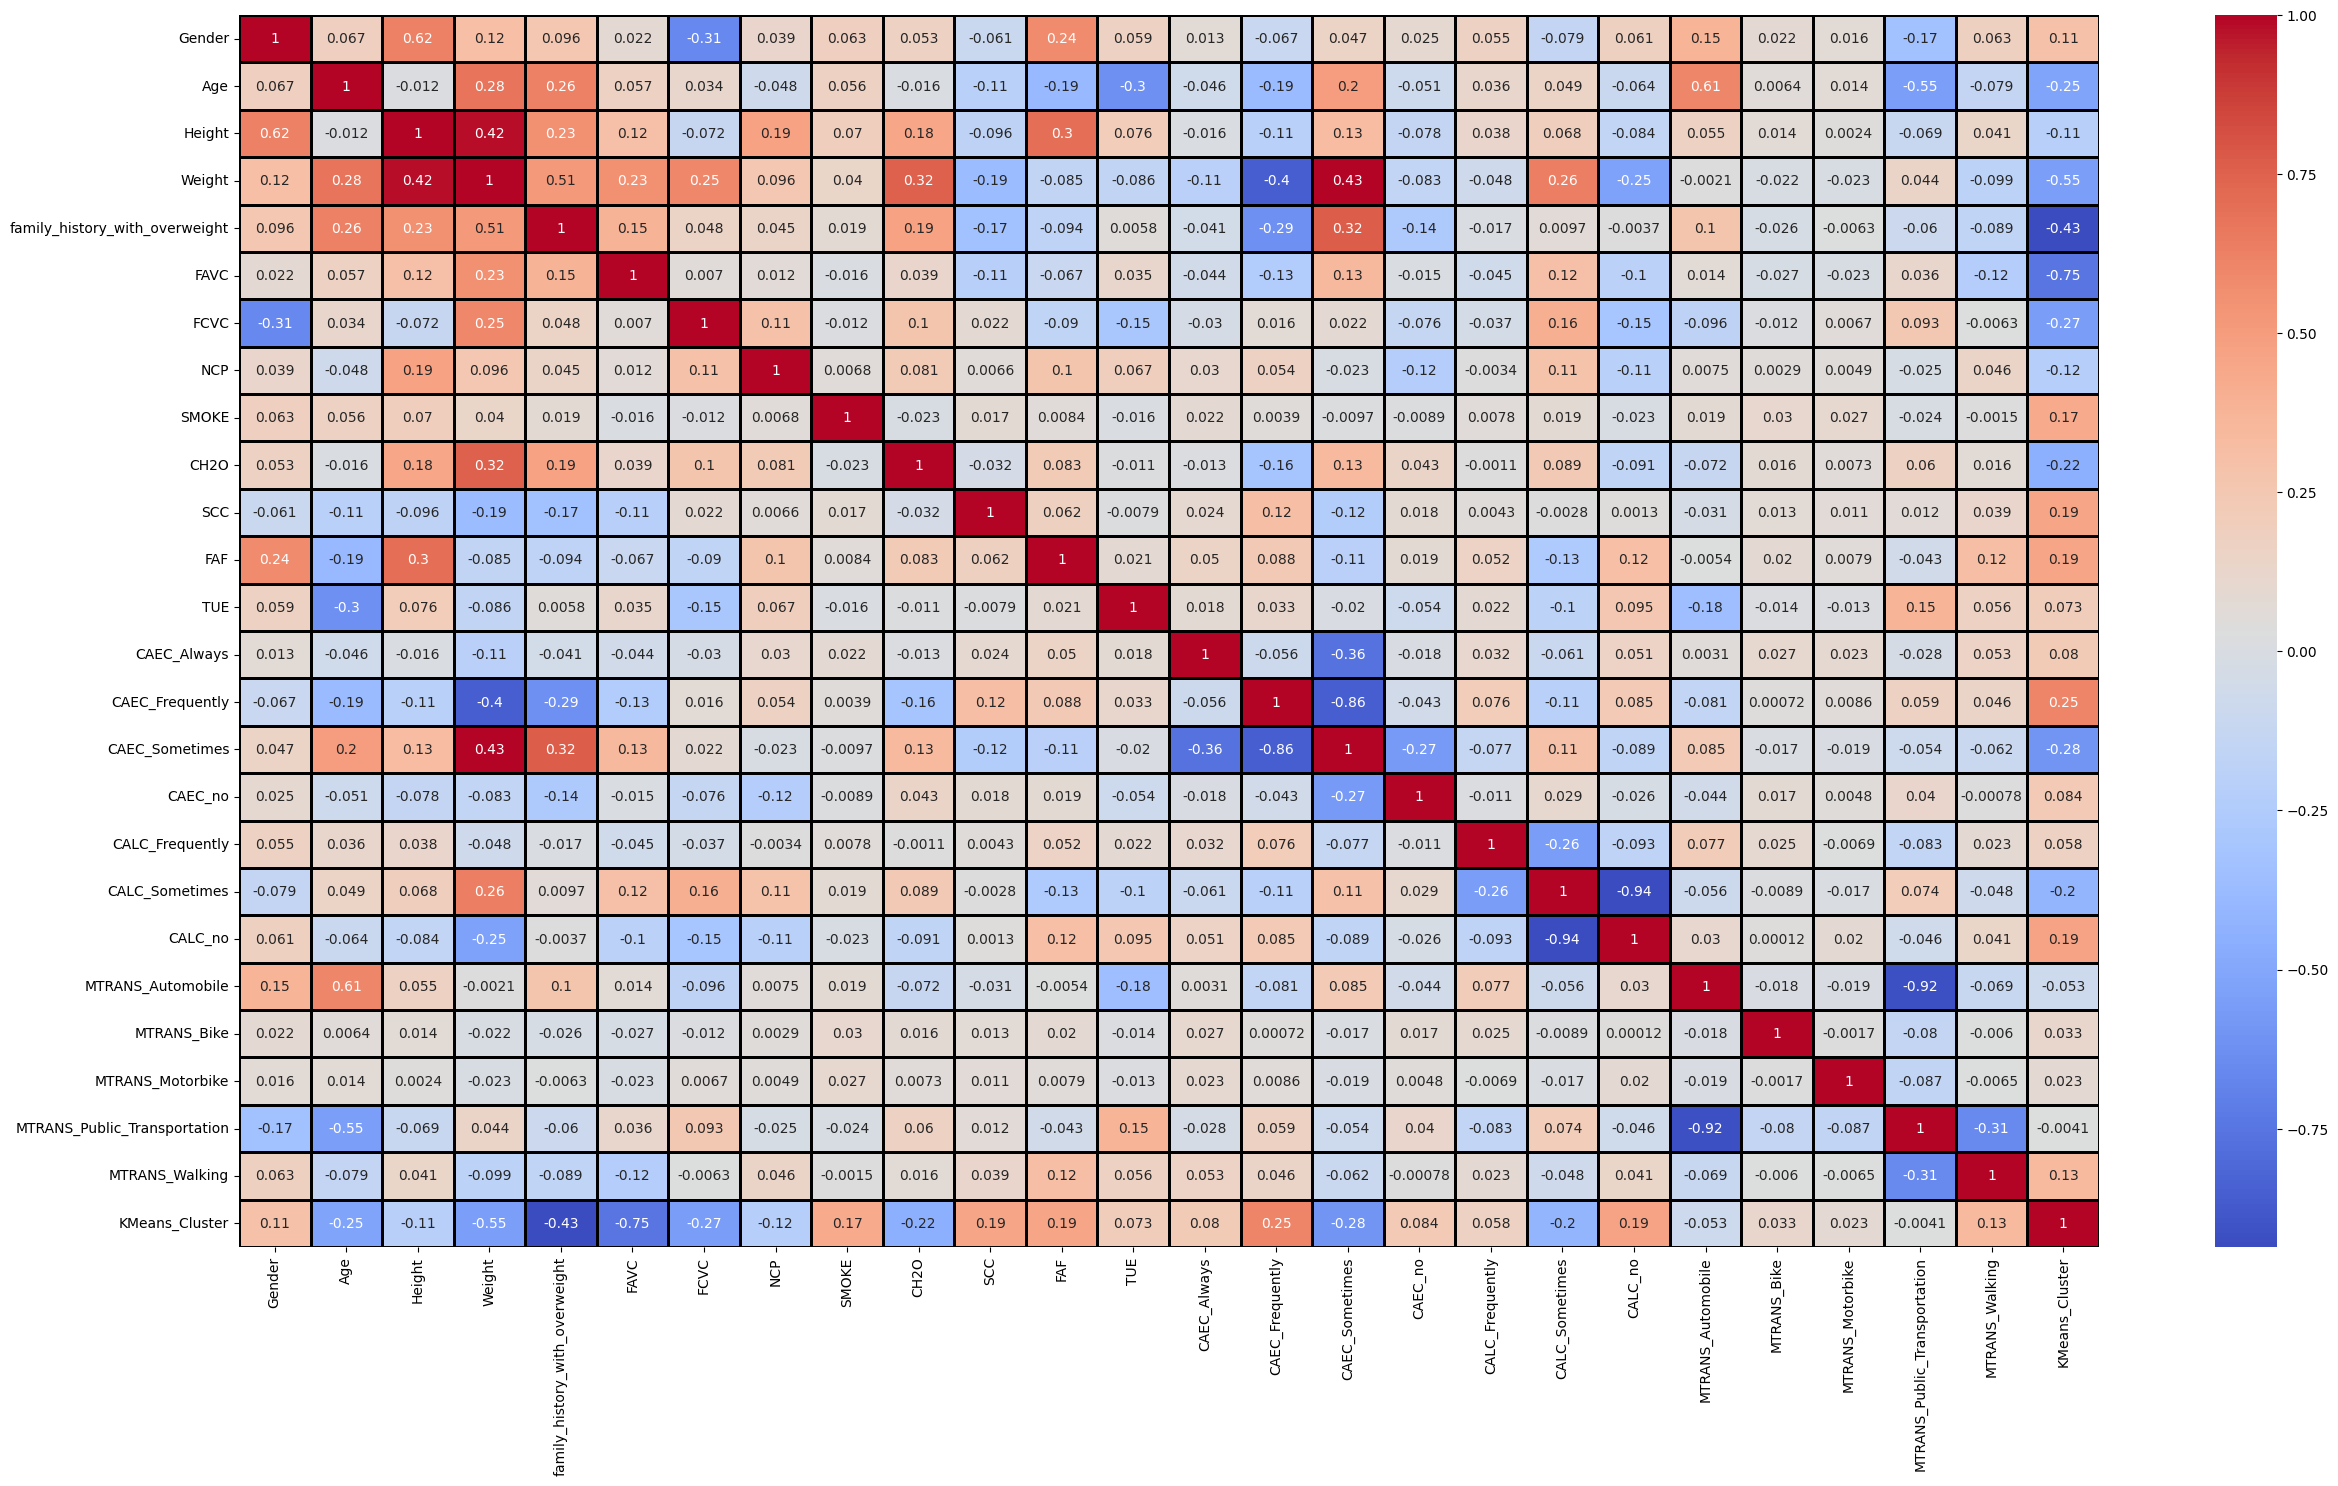

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suponiendo que df_encoded es tu DataFrame y ya está definido
# Calcular la matriz de correlación
corr = df_encoded.corr()

# Crear una máscara para ocultar correlaciones menores o iguales a 0.7
mask = np.abs(corr) <= 0.5

# Mapa de calor de correlaciones
plt.figure(figsize=(30, 16))
# Muestra todas las correlaciones, pero usa la máscara para ocultar las menores o iguales a 0.7
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
# Sobreponer las correlaciones mayores a 0.7 sin máscara, pero con líneas para diferenciar
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=~mask, cbar=False, linewidths=1, linecolor='black')
plt.show()



# EDA

* Cluster 0 (color gris): Este cluster tiene representación en todas las categorías de peso, pero es el dominante en la categoría de 'Insufficient Weight'. También tiene una presencia notable en 'Normal Weight' y 'Overweight Level I', pero es menos frecuente en categorías de obesidad más severas.

* Cluster 1 (color morado): Predomina en las categorías de 'Obesity Type III' y 'Obesity Type II', lo que sugiere que este cluster agrupa a individuos con un grado de obesidad más alto. También tiene una presencia menor en las categorías de 'Overweight Level II' y 'Obesity Type I', pero es raro en las categorías de peso insuficiente y normal.

* Cluster 2 (color rosa): Este cluster tiene una distribución más uniforme entre las categorías, pero destaca particularmente en 'Normal Weight' y 'Overweight Level I'. Tiene una presencia más baja en las categorías de obesidad, lo que podría indicar un perfil de riesgo intermedio.

* Cluster 3 (color marrón): Este cluster es el más frecuente en 'Obesity Type III', con una presencia muy limitada en las otras categorías. Esto sugiere que el Cluster 3 está compuesto en gran parte por individuos con obesidad de tipo III, la categoría más severa de obesidad en el conjunto de datos.

* Cluster 4 (color negro): Similar al Cluster 1, el Cluster 4 tiene una alta frecuencia en las categorías de 'Obesity Type II' y 'Obesity Type I', y también es el más común en 'Overweight Level II'. Es menos común en las categorías de 'Normal Weight' e 'Insufficient Weight', lo que indica que este cluster puede estar compuesto por individuos con tendencia al sobrepeso y la obesidad.

En general, el gráfico sugiere que los Clusters 1 y 4 agrupan a los individuos con mayor grado de obesidad, mientras que el Cluster 0 agrupa a aquellos con pesos más bajos. Los Clusters 2 y 3 parecen tener perfiles de riesgo intermedios y altos respectivamente. Estos insights pueden ser muy útiles para dirigir intervenciones y políticas de salud pública específicas para cada grupo.

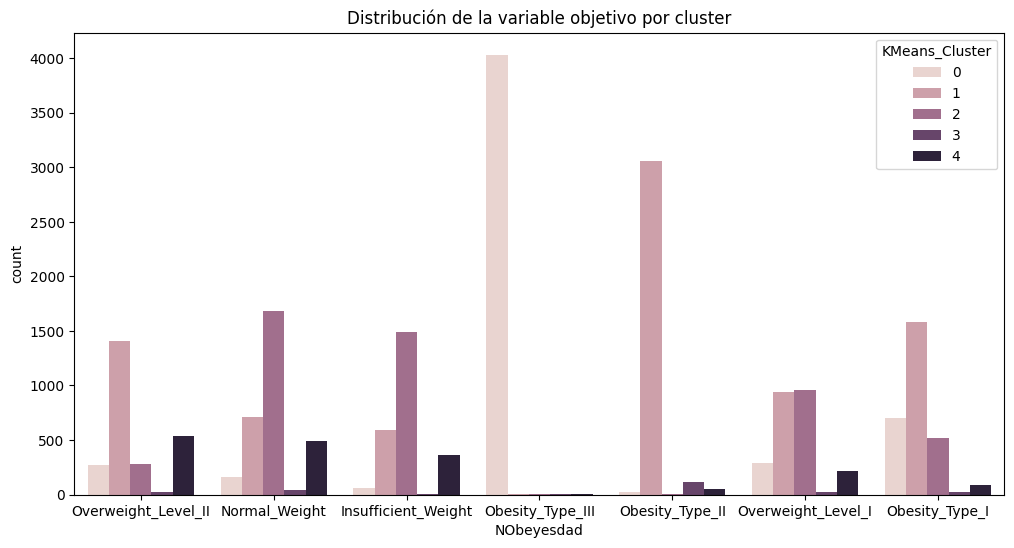

In [ ]:
# Comprobamos como se distribuye la variable objetivo en cada cluster de K-means

cluster_column = 'KMeans_Cluster'  # Cambia esto por el nombre real de tu columna de cluster
target_column = 'NObeyesdad'
plt.figure(figsize=(12, 6))
sns.countplot(x=target_column, hue=cluster_column, data=df_encoded)
plt.title('Distribución de la variable objetivo por cluster')
plt.show()



In [ ]:
# Observamos caracteristicas similares

grouped = df_encoded.groupby(cluster_column).mean()
display(grouped)

<ipython-input-24-f13fccf7fcf3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_encoded.groupby(cluster_column).mean()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.007051,25.825397,1.663899,106.611204,0.998373,1.000000,2.863601,2.907458,0.0,2.233678,...,0.966733,0.001266,0.009402,0.889532,0.101067,0.148074,0.000000,0.001085,0.849394,0.001446
1,0.988788,24.747392,1.763986,95.275128,0.968294,1.000000,2.277494,2.788445,0.0,2.091188,...,0.902712,0.004702,0.031585,0.690898,0.277517,0.249427,0.001567,0.001567,0.726462,0.020976
2,0.222987,20.356593,1.643106,61.077091,0.435451,1.000000,2.267845,2.559731,0.0,1.731429,...,0.666936,0.040267,0.024484,0.658033,0.317483,0.065965,0.001619,0.001619,0.902873,0.027924
3,0.787755,26.756709,1.755967,97.642970,0.885714,0.873469,2.386429,2.805348,1.0,1.898722,...,0.812245,0.004082,0.036735,0.804082,0.159184,0.236735,0.012245,0.012245,0.718367,0.020408
4,0.458453,22.710952,1.666447,67.985688,0.625215,0.000000,2.435192,2.734062,0.0,1.950647,...,0.687106,0.018911,0.048711,0.553582,0.397708,0.150143,0.004585,0.004585,0.759312,0.081375


In [ ]:
# Variacion de datos en cada grupo

for k in sorted(df_encoded[cluster_column].unique()):
    print(f"Variación dentro del Cluster {k}:")
    display(df_encoded[df_encoded[cluster_column] == k].std())  # Cambia std() por var() para la varianza


Variación dentro del Cluster 0:


<ipython-input-25-9d77407ec831>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df_encoded[df_encoded[cluster_column] == k].std())  # Cambia std() por var() para la varianza


Gender                             0.083682
Age                                5.701224
Height                             0.064028
Weight                            22.226353
family_history_with_overweight     0.040309
FAVC                               0.000000
FCVC                               0.331390
NCP                                0.417517
SMOKE                              0.000000
CH2O                               0.616997
SCC                                0.023285
FAF                                0.725347
TUE                                0.381551
CAEC_Always                        0.086817
CAEC_Frequently                    0.154326
CAEC_Sometimes                     0.179349
CAEC_no                            0.035556
CALC_Frequently                    0.096513
CALC_Sometimes                     0.313501
CALC_no                            0.301444
MTRANS_Automobile                  0.355206
MTRANS_Bike                        0.000000
MTRANS_Motorbike                

Variación dentro del Cluster 1:


<ipython-input-25-9d77407ec831>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df_encoded[df_encoded[cluster_column] == k].std())  # Cambia std() por var() para la varianza


Gender                             0.105296
Age                                5.801187
Height                             0.063097
Weight                            20.618368
family_history_with_overweight     0.175226
FAVC                               0.000000
FCVC                               0.465079
NCP                                0.632490
SMOKE                              0.000000
CH2O                               0.541406
SCC                                0.103032
FAF                                0.793314
TUE                                0.650197
CAEC_Always                        0.136701
CAEC_Frequently                    0.261034
CAEC_Sometimes                     0.296367
CAEC_no                            0.068411
CALC_Frequently                    0.174904
CALC_Sometimes                     0.462151
CALC_no                            0.447801
MTRANS_Automobile                  0.432708
MTRANS_Bike                        0.039559
MTRANS_Motorbike                

Variación dentro del Cluster 2:


<ipython-input-25-9d77407ec831>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df_encoded[df_encoded[cluster_column] == k].std())  # Cambia std() por var() para la varianza


Gender                             0.416292
Age                                3.142403
Height                             0.073041
Weight                            13.035086
family_history_with_overweight     0.495866
FAVC                               0.000000
FCVC                               0.569031
NCP                                0.956289
SMOKE                              0.000000
CH2O                               0.578426
SCC                                0.276159
FAF                                0.825489
TUE                                0.663404
CAEC_Always                        0.192775
CAEC_Frequently                    0.435425
CAEC_Sometimes                     0.471357
CAEC_no                            0.196605
CALC_Frequently                    0.154562
CALC_Sometimes                     0.474417
CALC_no                            0.465544
MTRANS_Automobile                  0.248246
MTRANS_Bike                        0.040206
MTRANS_Motorbike                

Variación dentro del Cluster 3:


<ipython-input-25-9d77407ec831>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df_encoded[df_encoded[cluster_column] == k].std())  # Cambia std() por var() para la varianza


Gender                             0.409734
Age                                5.834181
Height                             0.101846
Weight                            27.060304
family_history_with_overweight     0.318809
FAVC                               0.333127
FCVC                               0.501488
NCP                                0.666312
SMOKE                              0.000000
CH2O                               0.621876
SCC                                0.240232
FAF                                0.799324
TUE                                0.630339
CAEC_Always                        0.224614
CAEC_Frequently                    0.337666
CAEC_Sometimes                     0.391316
CAEC_no                            0.063888
CALC_Frequently                    0.188495
CALC_Sometimes                     0.397718
CALC_no                            0.366596
MTRANS_Automobile                  0.425948
MTRANS_Bike                        0.110202
MTRANS_Motorbike                

Variación dentro del Cluster 4:


<ipython-input-25-9d77407ec831>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df_encoded[df_encoded[cluster_column] == k].std())  # Cambia std() por var() para la varianza


Gender                             0.498414
Age                                5.996017
Height                             0.088819
Weight                            17.096008
family_history_with_overweight     0.484206
FAVC                               0.000000
FCVC                               0.525240
NCP                                0.791334
SMOKE                              0.000000
CH2O                               0.626630
SCC                                0.295836
FAF                                0.945472
TUE                                0.647642
CAEC_Always                        0.201573
CAEC_Frequently                    0.434043
CAEC_Sometimes                     0.463804
CAEC_no                            0.136250
CALC_Frequently                    0.215324
CALC_Sometimes                     0.497263
CALC_no                            0.489565
MTRANS_Automobile                  0.357314
MTRANS_Bike                        0.067573
MTRANS_Motorbike                

# FEATURES ENGINEERING

In [ ]:
# Definir una función para calcular el BMI (índice de masa corporal)
def calculate_bmi(weight, height):
    return weight / (height ** 2)

# Añadir la columna BMI a los DataFrames
df_encoded['BMI'] = calculate_bmi(df_encoded['Weight'], df_encoded['Height'])
test_df_encoded['BMI'] = calculate_bmi(test_df_encoded['Weight'], test_df_encoded['Height'])

# Añadir bmioncp = bmi/NCP

df_encoded['bmioncp'] = df_encoded['BMI'] / df_encoded['NCP']
test_df_encoded['bmioncp'] = test_df_encoded['BMI'] / test_df_encoded['NCP']


# Añadir bmip_faf = (bmi/25) * FAF

df_encoded['bmip_faf'] = (df_encoded['BMI'] / 25 ) * df_encoded['FAF']
test_df_encoded['bmip_faf'] = (test_df_encoded['BMI'] / 25) * test_df_encoded['FAF']

# Crear interacciones basadas en el mapa de correlaciones
# Por ejemplo, si 'FCVC' y 'NCP' están correlacionados con 'NObeyesdad' pero no entre sí,
# se podría crear una interacción entre ellos.

# Añadir la interacción de FCVC y NCP
df_encoded['FCVC_NCP'] = df_encoded['FCVC'] * df_encoded['NCP']
test_df_encoded['FCVC_NCP'] = test_df_encoded['FCVC'] * test_df_encoded['NCP']

# Añadir la interacción de FAF y TUE
# Aquí, estamos considerando que el inverso del tiempo en dispositivos electrónicos puede indicar un estilo de vida más activo
df_encoded['FAF_TUE'] = df_encoded['FAF'] * (1 / (df_encoded['TUE'] + 1))  # Evitar división por cero
test_df_encoded['FAF_TUE'] = test_df_encoded['FAF'] * (1 / (test_df_encoded['TUE'] + 1))  # Evitar división por cero

# Considerar el efecto no lineal de la edad en la obesidad
df_encoded['Age_sq'] = df_encoded['Age'] ** 2
test_df_encoded['Age_sq'] = test_df_encoded['Age'] ** 2

# Asegúrate de que estas nuevas características se incluyan en tu modelo y reentrenarlo si es necesario.

# ENTRENAMIENTO DEL MODELO

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Asumiendo que 'df_encoded' es tu DataFrame y ya has hecho la codificación one-hot para tus variables categóricas

# Separar las características y la etiqueta
X = df_encoded.drop(['NObeyesdad'], axis=1)  # o selecciona columnas específicas si has hecho selección de características
y = df_encoded['NObeyesdad']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el objeto Pool que es específico de CatBoost para datos de entrenamiento y validación
train_pool = Pool(X_train, y_train)
val_pool = Pool(X_test, y_test)

# Inicializar el clasificador CatBoost
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100
)

# Entrenar el modelo
catboost_model.fit(train_pool, eval_set=val_pool)

# Evaluar el modelo
print('Model is fitted: ' + str(catboost_model.is_fitted()))
print('Model params:')
print(catboost_model.get_params())

# Hacer predicciones
y_pred = catboost_model.predict(X_test)

# Evaluar las predicciones

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))


0:	learn: 0.8058533	test: 0.8121387	best: 0.8121387 (0)	total: 97.3ms	remaining: 1m 37s
100:	learn: 0.8990726	test: 0.8901734	best: 0.8906551 (84)	total: 7.36s	remaining: 1m 5s
200:	learn: 0.9173190	test: 0.8993256	best: 0.8993256 (200)	total: 16.2s	remaining: 1m 4s
300:	learn: 0.9273154	test: 0.9031792	best: 0.9036609 (276)	total: 25.9s	remaining: 1m
400:	learn: 0.9346622	test: 0.9031792	best: 0.9048651 (312)	total: 38.3s	remaining: 57.2s
500:	learn: 0.9412261	test: 0.9048651	best: 0.9048651 (312)	total: 50.8s	remaining: 50.6s
600:	learn: 0.9461038	test: 0.9036609	best: 0.9051060 (520)	total: 1m	remaining: 40.2s
700:	learn: 0.9517042	test: 0.9048651	best: 0.9058285 (655)	total: 1m 4s	remaining: 27.5s
800:	learn: 0.9569433	test: 0.9063102	best: 0.9067919 (785)	total: 1m 8s	remaining: 17.1s
900:	learn: 0.9609177	test: 0.9060694	best: 0.9072736 (887)	total: 1m 13s	remaining: 8.07s
999:	learn: 0.9638083	test: 0.9063102	best: 0.9072736 (887)	total: 1m 17s	remaining: 0us

bestTest = 0.90727

# Creamos Submission

In [ ]:
X.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'KMeans_Cluster', 'BMI', 'bmioncp', 'bmip_faf',
       'FCVC_NCP', 'FAF_TUE', 'Age_sq'],
      dtype='object')

In [ ]:
test_df_encoded = test_df_encoded.drop(['CALC_Always'], axis=1)

In [ ]:
test_df_encoded.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'KMeans_Cluster', 'BMI', 'bmioncp', 'bmip_faf',
       'FCVC_NCP', 'FAF_TUE', 'Age_sq'],
      dtype='object')

In [ ]:
# Realizar predicciones en el conjunto de prueba
test_pool = Pool(test_df_encoded)  # No necesitas la variable objetivo aquí
test_predictions = catboost_model.predict(test_pool)

# Crear el archivo de envío para Kaggle
submission_df = pd.DataFrame({'id': test_df.index, 'NObeyesdad': test_predictions.flatten()})
submission_df.to_csv('catboost_submission.csv', index=False)

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.3 MB/s eta 0:00:00


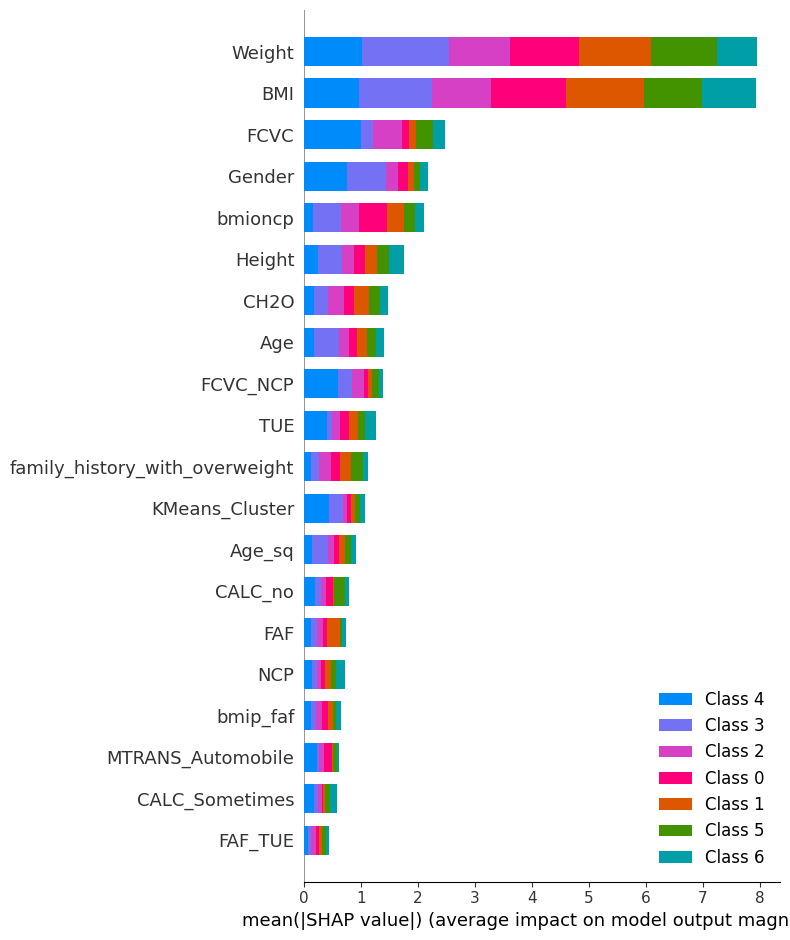

In [ ]:
import shap

# Explicar el modelo con valores SHAP
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Visualizar la importancia de las características
shap.summary_plot(shap_values, X_test)

# Incorporacion de los Scores al Dataset principal y Crear Excel para visualizacion

In [ ]:
# Asegurarse de que las longitudes coinciden
if len(test_predictions) == len(test_df):
    # Agregar las predicciones al dataframe original
    test_df['Predicciones_NObeyesdad'] = test_predictions.flatten()

    # Exportar a Excel
    test_df.to_excel('test_predictions.xlsx', index=False)
else:
    print("Error: La longitud de las predicciones no coincide con la longitud del dataframe.")


# Descargamos el archivo

In [ ]:
from google.colab import files

# Descargar el archivo
files.download('test_predictions.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>